# Design - Quantum Variables and Functions

In Qmod these types of quantum objects are represented by quantum variables:

* **Qubit** (quantum bit) 

    * Written as `QBit` in the Python SDK
    * Written as `qbit` in the native syntax

* **Qubit Array** 

    A sequence of qubits is considered as a quantum register with a definite number of qubits.
    
    * Written as `QArray` in the Python SDK
    * Written as `qbit[]` in the native syntax
    
* **Quantum Number**  

    A qubit array (quantum register) that represents numbers. The numbers can be positive and negative integers, and can be fixed point (e.g., $-5.25$). The quantum number object has a definite number of qubits (as does every qubit array), and it has two properties for its numeric representation: if the number is signed or not (only positive or it represents negative numbers as well) and how many fractional digits it has (where is the decimal point).

    * Written as `QNum` in the Python SDK
    * Written as `qnum` in the native syntax

As explained in the [Design page](https://docs.classiq.io/latest/classiq_101/classiq_concepts/design/), you must declare and then initialize each quantum variable.

## Concrete Example

First, understand these quantum variables through a concrete example.

The task is to design a quantum algorithm that flips the most significant bit (MSB) of a quantum number and then verify the new number.

<details>
<summary> What is the MSB? </summary>

In a binary representation, every number can be represented by a bit string (a sequence of zeros and ones). For example, the number $6$ can be represented by the bit string $110$. How? To understand it better, move one bit at a time and sum up the multiplication of the bit value times $2$ to the power of the bit position.

Start with the rightmost bit, called the least significant bit (LSB) since its position is the 0th position. Sum $0\times 2^0 =0$ plus $1\times 2^1=2$ for the middle bit plus $1\times 2^2=4$ for the leftmost bit—the most significant bit (MSB) since its contribution to the sum is the most significant.

</details>

This is how to handle it. Use the `flip_msb` function that receives a qubit array and flips its MSB. Call this function from the `main` function with some quantum number, and then verify the number using a qubit indicator.


The `flip_msb` function receives a `QArray` variable named `reg` (shortcut for register), and it flips its MSB using the `X` gate. This gate operates on the qubit at the last position of the qubit array `reg` where the counting starts from $0$. The property `len` of the register `reg` is used as part of the function.

In [1]:
from classiq import *


@qfunc
def flip_msb(reg: QArray):
    X(reg[reg.len - 1])

Note that the variable `reg` is not initialized within the scope of the function `flip_msb`. This can be seen by the lack of the `output` declaration in the scope of the function, and it means that `reg` is initialized before it is called in the function. 

Now to the `main` function. 

There is only one variable as an argument for the function, which is the indicator, regardless of whether the MSB successfully flips. This is a qubit variable named `indicator`. 

Within the function itself, declare and initialize a quantum number named `x` with $4$ qubits. A general initialization with `allocate` initializes the quantum number to the state $|0\rangle = |0000\rangle$. (This is true for both qubits and qubit arrays). The function `flip_msb` acts on the quantum number `x`, flipping its MSB and creating the state $|1000\rangle = |8\rangle$.

<details>
<summary> NOTE </summary>

There is no need to declare if the quantum number is signed nor the number of its fractional digits. It is initialized with no fractional digits and is not signed (see [`allocate_num`](https://docs.classiq.io/latest/qmod-reference/language-reference/quantum-types/) for initializing a quantum number with these options). 

</details>

In [2]:
@qfunc
def main(indicator: Output[QBit]):

    x = QNum("x")
    allocate(4, x)
    flip_msb(x)

    indicator |= x == 8


Finally, initialize the `indicator` qubit with the numeric assignment of the expression $x==8$. That is, if you flip the MSB of `x` and transform it to the state `|8\rangle`, then the state of the qubit `indicator` equals $|1\rangle$; otherwise, it equals $|0\rangle (i.e., indicating if the `flip_msb` operation succeeded).

<details>
<summary> Does `flip_msb` receive a quantum number or a quantum array? </summary>
Note that the function `flip_msb` is called with the quantum number `x` from the `main` function, whilst it is declared with a quantum array named `reg`. This demonstrates that quantum numbers can be cast to quantum arrays if they have the same number of qubits. In `main` you want to manipulate an arithmetic quantum object—a quantum number—whilst in the function `flip_msb` you just want to treat the quantum number as a qubit array, without its numeric description, and to apply a specific gate on one of its qubits.
</details>

That's it! Now, to check if the MSB flipped successfully, synthesize and view the quantum program:

In [5]:
quantum_program = synthesize(create_model(main))
show(quantum_program)

Opening: https://platform.classiq.io/circuit/1f2e3e92-d035-4eaa-9a9b-0ae1fe66d7aa?version=0.62.0


<div  style="text-align:center;">
    <img src="https://docs.classiq.io/resources/quantum_variables_and_functions.gif">
</div>

Execute the quantum program to receive the results:

In [6]:
job = execute(quantum_program)
results = job.result()[0].value.parsed_counts
print(results)

[{'indicator': 1}: 2048]


<div  style="text-align:center;">
    <img src="https://docs.classiq.io/resources/quantum_variables_and_functions_execution.gif">
</div>

You did flip the MSB as indicated by the `indicator` variable.

## Summary - Quantum Variables and Functions Guidelines

The following summarizes the main takeaways from the example in terms of quantum variables and functions:

* Types of quantum objects in Qmod: qubit, qubit array, and quantum number. Objects can be cast from one to another (as `x` is cast from the quantum number in the `main` function to a qubit array with the `flip_msb` function).
* Quantum objects are represented by quantum variables. Each variable needs to be declared and initialized before it is used. The initialization can be done in several ways, and here are two options: with the `allocate` function (the initialization of `x`) or with a numeric assignment (the initialization of `indicator`).
* Quantum variables that are arguments of a function can be declared with the `Output` modifier and initialized within the scope of a function (like `indicator` in the `main` function). Without the `Output` modifier they must be initialized outside the scope of the function (like `reg` in the `flip_msb`) function.
* Quantum variables can be declared and initialized within a function (like `x` in the `main` function).
* The quantum program is always generated from the `main` function, even when further quantum functions are used. The execution results of the quantum program are interpreted only for the arguments of the `main` function (like `indicator` in the above example).


## Verify Your Understanding - Recommended Exercise

Create another quantum function `flip_lsb` that flips the least significant bit.

In [9]:
write_qmod(create_model(main), "quantum_variables_and_functions")

from classiq import *


@qfunc
def flip_lsb(reg: QArray):
    X(reg[0])


@qfunc
def main(indicator: Output[QBit]):

    x = QNum("x")
    allocate(4, x)
    flip_lsb(x)

    indicator |= x == 1

quantum_program = synthesize(create_model(main))
show(quantum_program)

job = execute(quantum_program)
results = job.result()[0].value.parsed_counts
print(results)

Opening: https://platform.classiq.io/circuit/8eccef17-ebd2-41d6-878b-8ec77a725202?version=0.62.0
[{'indicator': 1}: 2048]


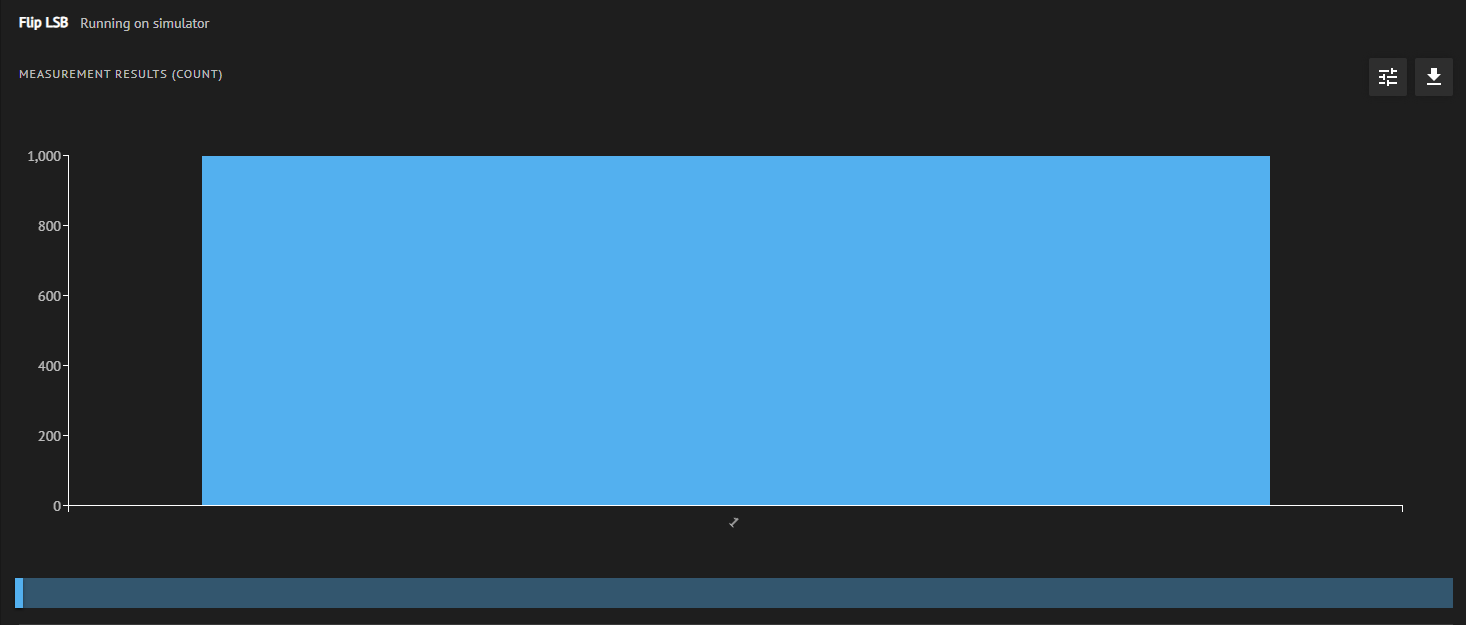